# **Visualization of MyAnimeList Anime Data**

Tasks of this notebook:
- Exploratory data analysis
- Visualizations

**1. Initial Setup** 

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import plotly.graph_objects as go
import openchord as ocd
import itertools
import numpy as np
import scipy.stats
import ast

In [393]:
# Defintion of functions and values of some constants
anime_data = pd.read_csv('anime_data_vis.csv')

COLOR_GENRES = {
    "Action": "#e74c3c",
    "Adventure": "#f39c12",
    "Avant Garde": "#8e44ad",
    "Award Winning": "#27ae60",
    "Boys Love": "#fd79a8",
    "Comedy": "#f1c40f",
    "Drama": "#9b59b6",
    "Fantasy": "#8e44ad",
    "Girls Love": "#e84393",
    "Gourmet": "#d35400",
    "Horror": "#c0392b",
    "Mystery": "#34495e",
    "Romance": "#e91e63",
    "Sci-Fi": "#2980b9",
    "Slice of Life": "#1abc9c",
    "Sports": "#27ae60",
    "Supernatural": "#2c3e50",
    "Suspense": "#7f8c8d",
    "Ecchi": "#f368e0",
    "Erotica": "#c44569",
    "Hentai": "#6D214F"
}


COLOR_THEMES = {
    "Adult Cast": "#6c5ce7",
    "Anthropomorphic": "#a29bfe",
    "CGDCT": "#ffeaa7",
    "Childcare": "#fab1a0",
    "Combat Sports": "#d63031",
    "Crossdressing": "#e84393",
    "Delinquents": "#636e72",
    "Detective": "#2d3436",
    "Educational": "#55efc4",
    "Gag Humor": "#fdcb6e",
    "Gore": "#d63031",
    "Harem": "#f8c291",
    "High Stakes Game": "#e67e22",
    "Historical": "#a29bfe",
    "Idols (Female)": "#f5a6e6",
    "Idols (Male)": "#74b9ff",
    "Isekai": "#6c5ce7",
    "Iyashikei": "#81ecec",
    "Love Polygon": "#ff6b81",
    "Love Status Quo": "#ff9ff3",
    "Magical Sex Shift": "#f368e0",
    "Mahou Shoujo": "#e056fd",
    "Martial Arts": "#b71540",
    "Mecha": "#7f8c8d",
    "Medical": "#00cec9",
    "Military": "#636e72",
    "Music": "#1e90ff",
    "Mythology": "#a29bfe",
    "Organized Crime": "#2f3542",
    "Otaku Culture": "#ff9f1a",
    "Parody": "#ffeaa7",
    "Performing Arts": "#74b9ff",
    "Pets": "#00b894",
    "Psychological": "#e17055",
    "Racing": "#d63031",
    "Reincarnation": "#6c5ce7",
    "Reverse Harem": "#f3a683",
    "Samurai": "#d35400",
    "School": "#3498db",
    "Showbiz": "#fab1a0",
    "Space": "#2c3e50",
    "Strategy Game": "#6c5ce7",
    "Super Power": "#16a085",
    "Survival": "#b71540",
    "Team Sports": "#27ae60",
    "Time Travel": "#a3cb38",
    "Urban Fantasy": "#2d98da",
    "Vampire": "#833471",
    "Video Game": "#9b59b6",
    "Villainess": "#ff6b6b",
    "Visual Arts": "#f6e58d",
    "Workplace": "#95afc0"
}


COLOR_DEMOGRAPHICS = {
    "Josei": "#f8a5c2",
    "Kids": "#f6e58d",
    "Seinen": "#2f3542",
    "Shoujo": "#f78fb3",
    "Shounen": "#e77f67"
}



TODO List + Some ideas
- Number of animes per genres, type, rating, etc ....
- Average score, members, and favoruites per genre
- Average score, memebers, and favourites per season
- Average score based on soruce material
- score vs scored_by scatter plot, rank vs popularity scatter plot
- Distrubtiton of scores, memebers

- Average score and members per licensors, producers, studios

- Number of animes released per season and per year (2 Line Plots)
- Pairplot score, scored_by, members, episodes, type

- Average score over time (Line Plot)
- Word cloud of the most common words in a title
- Chord diagram of relationships between genres
- Treemap  or pie chart of animes by genres and type
- PCA 
- Heatmap of anime realease frequency by season and by year
- Number of animes realeased per year differnated by the genre,themes,demographic (So we can see different trends)


# Basic Analysis

In [394]:
print(f"Top 5 animes with the highest score:\n{anime_data.nlargest(5, columns=['score']).sort_values('score', ascending=False)[['title', 'score', 'rank']] }")
print(f"Top 5 animes with the lowest scores:\n{anime_data.nsmallest(5, columns=['score']).sort_values('score', ascending=False)[['title', 'score', 'rank']]}")
print(f"Top 5 animes with the highest number of members: \n {anime_data.nlargest(5, columns=['members']).sort_values('members', ascending=False)[['title', 'members', 'popularity']] }")
print(f"Top 5 animes with the lowest number of members: \n{anime_data.nsmallest(5, columns=['members']).sort_values('members', ascending=False)[['title', 'members', 'popularity']] }")
print(f"Top 10 animes with the most episodes:\n{anime_data.nlargest(10, 'episodes')[['title', 'episodes']]}") # LMAO One Piece doesnt crack the list

Top 5 animes with the highest score:
                                    title  score  rank
23013                   Sousou no Frieren   9.30   1.0
3960     Fullmetal Alchemist: Brotherhood   9.10   2.0
5664                          Steins;Gate   9.07   3.0
9873                             Gintama°   9.05   5.0
14838  Shingeki no Kyojin Season 3 Part 2   9.05   4.0
Top 5 animes with the lowest scores:
                              title  score     rank
10977                      Kokuhaku   2.41  14079.0
4193                   Tsui no Sora   2.32      NaN
387                 Hametsu no Mars   2.23  14080.0
6944             Utsu Musume Sayuri   2.00  14081.0
2925   Tenkuu Danzai Skelter+Heaven   1.89  14082.0
Top 5 animes with the highest number of members: 
                                   title  members  popularity
7425                 Shingeki no Kyojin  4172424           1
1393                         Death Note  4116283           2
3960   Fullmetal Alchemist: Brotherhood  3530628  

# Genres <br>
### Calculating average and members score per genre

In [395]:
# Recall that all genres are in a list: So to seperate we are going to explode it 
# This just means that each genre in be in it's own column
anime_data['genres'] = anime_data['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
genres_exploded = anime_data.explode('genres')
genres_exploded = genres_exploded.dropna(subset={'genres'})
avg_score_per_genre = genres_exploded.groupby('genres')['score'].mean().sort_values(ascending=False) 
avg__member_per_genre = genres_exploded.groupby('genres')['members'].mean().sort_values(ascending=False)

### Average score and number of members per genre

In [ ]:
avg_score_per_genre = avg_score_per_genre.reset_index()
avg__member_per_genre = avg__member_per_genre.reset_index()

fig = px.bar(avg_score_per_genre, x='genres', y='score', color='genres', color_discrete_map=COLOR_GENRES)
fig.show()

fig = px.bar(avg__member_per_genre, x='genres', y='members', color='genres', color_discrete_map=COLOR_GENRES)
fig.show()


### Relationships between genres

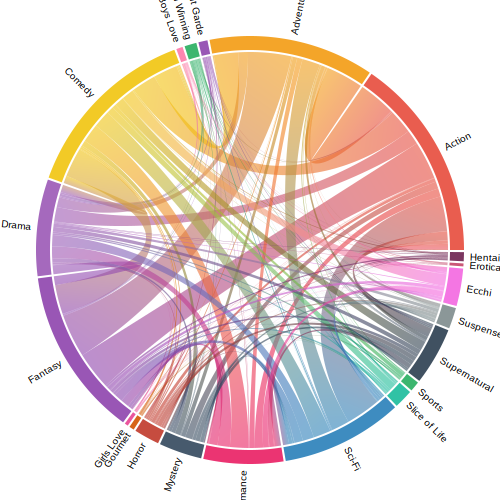

In [401]:
GENRES = list(COLOR_GENRES.keys())
genre_index = {genre: i for i, genre in enumerate(GENRES)}
matrix = np.zeros((len(GENRES), len(GENRES)), dtype=int)

for genre_list in anime_data['genres']:
    for g1, g2 in itertools.combinations(genre_list, 2):
        i, j = genre_index[g1], genre_index[g2]
        matrix[i][j] += 1
        matrix[j][i] += 1  

# Create the chord diagram
fig = ocd.Chord(matrix, labels=GENRES)
fig.colormap = list(COLOR_GENRES.values())
fig.show()



### Bar charat of number of animes per genres every year 

In [402]:
d1 = genres_exploded.groupby('year')['genres'].value_counts() # Counting amount of genres released per year
d1 =  d1.reset_index() 
d1 = d1.rename(columns={"count": "num_genre_released"})

fig = go.Figure(px.bar(d1, x='year', y='num_genre_released', color='genres', color_discrete_map=COLOR_GENRES))
fig.update_layout(
    xaxis_title=dict(text="Year"),
    yaxis_title=dict(text="Animes Released"),
    title=dict(text="Number of Anime's Relased Per Genre")
)

fig.show()

### Line chart of genre frequency over time

In [403]:
d1 = genres_exploded.groupby('year')['genres'].value_counts().reset_index()
fig = px.line(d1, x='year', y='count', color='genres', color_discrete_map=COLOR_GENRES)
fig.update_layout(
    xaxis_title = dict(text="Year"),
    yaxis_title = dict(text="Number of Genres"),
    title = dict(text="Genre frequency over time")
)
fig.show()

### 